http://cs231n.github.io/neural-networks-case-study/#grad

In [199]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib

matplotlib.rcParams["scatter.edgecolors"] = '#000000'

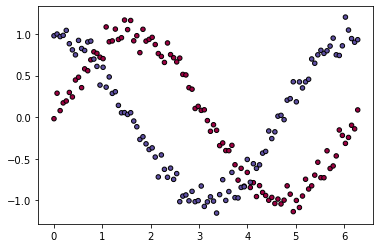

In [200]:
N = 100
t = np.linspace(0.0, 2 * np.pi, N)
sin = np.sin(t) + np.random.randn(N) * 0.1
cos = np.cos(t) + np.random.randn(N) * 0.1

c1 = range(0, N)
c2 = range(N, N*2)

tt = np.zeros(N*2)
tc = np.zeros(N*2)
Y = np.zeros(N*2)
tt[c1] = t
tt[c2] = t
tc[c1] = 1
tc[c2] = 20
Y[c1] = sin
Y[c2] = cos


plt.scatter(tt, Y, c=tc, s=20, cmap=plt.cm.Spectral)

In [251]:

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:

# fig, ax = plt.subplots(figsize=(12, 10))
# ax.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o', cmap=plt.cm.Spectral)

In [252]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores, [num_examples, K]
    # each row is (score1, score2, score3)  for a given example
    scores = np.dot(X, W) + b  # [N x K]

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration {}: loss {}".format(i, loss))

    # compute the gradient on scores
    dscores = probs # [N x K]
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.0974794059389084
iteration 10: loss 0.9129509476347114
iteration 20: loss 0.8441598693586866
iteration 30: loss 0.8129709079106655
iteration 40: loss 0.796830228389731
iteration 50: loss 0.7877190525974873
iteration 60: loss 0.7822606070931676
iteration 70: loss 0.7788482355449713
iteration 80: loss 0.7766464786458975
iteration 90: loss 0.7751911251988106
iteration 100: loss 0.774210819357159
iteration 110: loss 0.7735405154216481
iteration 120: loss 0.7730766010194379
iteration 130: loss 0.7727523437087475
iteration 140: loss 0.7725238535409724
iteration 150: loss 0.7723617596600683
iteration 160: loss 0.7722461217030738
iteration 170: loss 0.7721632372495773
iteration 180: loss 0.7721035941689538
iteration 190: loss 0.7720605322410802


In [214]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [215]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [234]:
c = np.array([
    [1, 2],
    [4, 3],
    [2, 2]    
])

np.sum(c, axis=1, keepdims=True), c/np.sum(c, axis=1, keepdims=True), c / np.array([[3], [7], [4]])

(array([[3],
        [7],
        [4]]), array([[0.33333333, 0.66666667],
        [0.57142857, 0.42857143],
        [0.5       , 0.5       ]]), array([[0.33333333, 0.66666667],
        [0.57142857, 0.42857143],
        [0.5       , 0.5       ]]))